# Lab 1d: Let's build a Self Organizing Map (SOM) for Synthetic Coagulation Data
A self-organizing map (SOM) is an unsupervised machine learning technique used to produce a low-dimensional, e.g., two-dimensional representation of high-dimension data while preserving the topological structure of the data. For example, a data set with $p$-variables with $n$-observations
could be represented as clusters of observations with similar values for the variables. 
* These clusters could then be visualized as a two-dimensional map such that observations in proximal clusters have more similar values than in distal clusters. This can make high-dimensional data easier to visualize and analyze.

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our lab problem.

In [3]:
include("Include.jl");

## Prerequisites: Constants and measurement data
Fill me in

In [5]:
dataset = MySyntheticDataset() |> d-> d["ensemble"]; # optional keyword arg visit::Int where visit = {1 | 2 | 3}

The keys of the dataset dictionary are the `actual` patient indexes. These keys point to `synthetic` patient measurement vectors constructed by building a model of the original data distribution. To explore this data, specify an original patient index (one of the keys of the original dictionary) in the `original_patient_index::Int` variable:

In [7]:
original_patient_index = 5; # i ∈ {keys}

Next, we'll build a data matrix with the `synthetic` measurement vectors for the specified original patient index. We'll store this in the `D::Array{<:Number, 1}` matrix. This data will be [z-score transformed](https://en.wikipedia.org/wiki/Standard_score), i.e., we center the data and normalize it by the standard deviation. Thus, all features will be on the same scale.

In [9]:
D = let

    M = dataset[original_patient_index];
    number_of_rows = length(M); # number of synthetic patients
    number_of_cols = length(M[1]); # number of measurements (features)
    D = Array{Float64,2}(undef, number_of_rows, number_of_cols);

    for i ∈ 0:(number_of_rows - 1)
        for j ∈ 1:number_of_cols
            D[i+1,j] = M[i][j];
        end
    end

    D̂ = copy(D);
    for j ∈ 1:number_of_cols
        sample_vector = D[:,j]; 
        μ = mean(sample_vector);
        σ = std(sample_vector);

        for i ∈ 1:number_of_rows
            D̂[i,j] = (sample_vector[i] - μ)/σ;
        end
    end
    
    D̂
end

101×33 Matrix{Float64}:
  7.08039     3.9274     -0.295529   …  -0.0242932   0.178453    -0.158596
 -0.315218   -1.30783    -1.47031        0.415144   -0.00362048  -1.17389
  0.228354   -1.0863      1.59444        0.399039    0.802471    -0.385412
 -0.816669    0.768979    1.12862       -0.321638    1.32182      0.843835
 -0.609244   -1.30771     0.573103       0.0724211  -0.531018     1.21127
 -0.80657     0.0361524   1.07447    …  -0.586895    0.0281126    1.23406
 -0.810755    0.26205    -0.977241      -0.215019   -0.81634      1.16312
  0.109794   -0.104268    0.104168      -1.58241    -0.454667    -1.1133
 -0.651089   -0.126094   -0.748516      -0.417613    0.358321     0.339289
 -0.576326   -0.288959   -0.320409      -2.05204     1.03913     -0.246732
 -0.401706   -0.802253    0.0589632  …  -0.848943   -0.106217     0.620042
  0.126811   -0.587533   -1.1966         0.316439   -0.499579     0.0567096
  0.27421    -0.0737874  -1.17073       -0.0622585   0.937717     0.0879358
  ⋮  

Fill me in

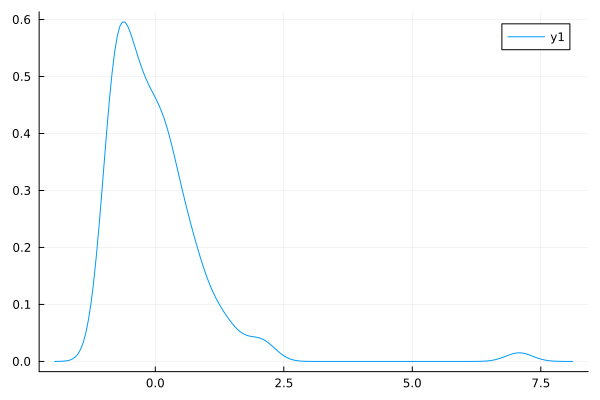

In [11]:
density(D[:,1])

Finally, let's setup some constants that we'll use later.

In [13]:
number_of_neuron_rows = 10; 
number_of_neuron_cols = 10;
number_of_neurons = (number_of_neuron_rows)*(number_of_neuron_cols); # how many neurons are we going to use?
number_of_examples = size(D,1); # number of synthetic patients
number_of_features = size(D,2); # number of features (measurements)
maxiter = 25000; # maximum number of iterations
ϵ = 0.00001; # stopping criteria

In [14]:
number_of_neurons

100

## Task 1: Setup the SOM model instance
Fill me in

In [16]:
model = build(MySimpleRectangularSelfOrganizingMapModel, (
    number_of_neurons = number_of_neurons,
    number_of_features = number_of_features,
    α = (t::Int) -> 1.0 - t/maxiter, # learning rate function
    σ = (t::Int, radius::Float64) -> 0.99*radius, # neighborhood radius function
    h = (distance::Float64,r::Float64) -> exp(-(distance^2)/(2.0*r^2)), # neighborhood function
));

## Task 2: Learn the SOM weight parameters
Fill me in

In [18]:
W = learn(model, D, maxiter = maxiter, ϵ = ϵ);

Stopping at iteration: 263


In [19]:
W

100×33 Matrix{Float64}:
 -0.274081   0.794929    0.684411   …   1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411   …   1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411   …   1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
 -0.274081   0.794929    0.684411       1.99502     0.324958  -0.369197
  ⋮                                 ⋱   

Compute the array of best matching units and the worst matching units for each example in the scaled dataset

In [114]:
matching_array = let

    M = number_of_examples;
    error = Array{Float64,1}(undef, M);
    bmu = Array{Int,2}(undef, M,2);
    
    d = Euclidean(); # distance metric 
    
    
    for i ∈ 1:M
        X = D[i,:]; # data
        j = argmin([d(X, W[i,:]) for i ∈ 1:number_of_neurons]); # index of the best node for this measurement
        k = argmax([d(X, W[i,:]) for i ∈ 1:number_of_neurons]); # index of the worst node for this measurement
        error[i] = sum((X .- W[j,:]).^2);

        bmu[i,1] = j;
        bmu[i,2] = k;
    end
    
   bmu
end;

In [116]:
matching_array

101×2 Matrix{Int64}:
 68  80
 78  98
 79  68
 84  71
 93  67
 97  98
 93  68
 69  97
 74  67
 76  67
 79  67
 82  67
 90  71
  ⋮  
 91  96
 77  68
 77  84
 81  95
 75  97
 73  68
 77  81
 96  69
 66  84
 82  86
 93  98
 74  86

Fill me in

In [119]:
error_bounds_array = let

    M = number_of_examples;
    error_bounds_array = Array{Float64,2}(undef, M, 2);
    for i ∈ 1:M

        b = matching_array[i,1];
        w = matching_array[i,2];
        SF = dot(D[i,:],D[i,:]);
        error_bounds_array[i,1] = 1 - (1/SF)*dot(W[b,:],D[i,:]); 
        error_bounds_array[i,2] = 1 - (1/SF)*dot(W[w,:],D[i,:]);
    end
    error_bounds_array
end

101×2 Matrix{Float64}:
 4.10642e-5  1.07555
 0.00652373  1.48334
 0.640282    1.0965
 0.00673396  1.18534
 0.460561    1.47931
 1.10438e-6  1.30765
 0.680241    1.29307
 0.454233    1.37036
 0.00650227  1.44871
 0.00561083  1.19124
 0.641358    1.1174
 0.032002    0.973022
 0.0237166   1.47459
 ⋮           
 0.0045183   1.48323
 0.757881    1.33347
 0.822405    1.76015
 7.06696e-7  1.51773
 0.475028    1.62326
 0.648285    1.3278
 0.552379    1.82362
 0.0048676   1.72411
 0.756675    1.62304
 0.429522    1.55619
 0.65514     1.68108
 0.417486    1.27436

## Task 3: Visualize the SOM performance
Fill me in

In [ ]:
scatter!